# Part 1

- ## Loading the dataset

In [62]:
import numpy as np
from numpy.lib.recfunctions import structured_to_unstructured

In [63]:
data = np.genfromtxt('iris.data', delimiter=",", encoding="utf8", dtype=None)
features = structured_to_unstructured(data[["f0", "f1", "f2", "f3"]])
names = data["f4"]
f"Memory size: {features.nbytes + names.nbytes} bytes"

'Memory size: 13800 bytes'

In [64]:
features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

- ## Normalizing

In [65]:
norm_features = (features - features.min(axis=0)) / (features.max(axis=0) - features.min(axis=0))
norm_features

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

- ## Defining fourth feature as a categorical variable

In [66]:
first_q = np.quantile(norm_features[3], 0.25)
second_q = np.quantile(norm_features[3], 0.75)

fc = norm_features[:,3]
third_feature_column = np.where(fc < first_q, "small", np.where(fc > second_q, "big", "medium"))
third_feature_column

array(['small', 'small', 'small', 'small', 'small', 'medium', 'medium',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'medium', 'medium', 'medium', 'medium', 'medium', 'small',
       'medium', 'small', 'medium', 'small', 'small', 'medium', 'small',
       'small', 'small', 'small', 'medium', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'medium', 'medium',
       'small', 'big', 'medium', 'medium', 'small', 'small', 'small',
       'small', 'big', 'big', 'big', 'big', 'big', 'big', 'big', 'big',
       'big', 'big', 'big', 'big', 'big', 'big', 'big', 'big', 'big',
       'big', 'big', 'big', 'big', 'big', 'big', 'big', 'big', 'big',
       'big', 'big', 'big', 'big', 'big', 'big', 'big', 'big', 'big',
       'big', 'big', 'big', 'big', 'big', 'big', 'big', 'big', 'big',
       'big', 'big', 'big', 'big', 'big', 'big', 'big', 'big', 'big',
       'big', 'big', 'big', 'big', 'big', 'big', 'big', 'big', 'big',
     

- ## Splitting dataset into two

In [67]:
def get_sets(f, n):
    indices = np.random.permutation(f.shape[0])
    train_percentage = int(f.shape[0] * 0.8)
    training_idx, test_idx = indices[:train_percentage], indices[train_percentage:]

    training_features, training_names = f[training_idx], n[training_idx]
    test_features, test_names = f[test_idx], n[test_idx]
    return training_features, training_names, test_features, test_names

In [68]:
tr_f, tr_n, te_f, te_n = get_sets(features, names)
f"{tr_f.shape[0]} rows in training set, {te_f.shape[0]} rows in testing set"

'120 rows in training set, 30 rows in testing set'

# Part 2

- ## Data classification (testing classifier SVC on various selections)

In [69]:
import sklearn as sk
from sklearn import svm

In [70]:
def get_stats(expected, actual):
    wrong_predictions = [f"Expected: {w}, actual {c}" for w,c in dict(zip(expected, actual)).items() if w != c]
    accuracy = (len(expected) - len(wrong_predictions)) / len(expected)
    return wrong_predictions, accuracy

In [71]:
def test_classifier(clf, num_of_tests=20):
    np.random.seed(42)
    for i in range(num_of_tests):
        train_f, train_n, test_f, test_n = get_sets(features, names)
        clf = sk.base.clone(clf)
        clf.fit(train_f, train_n)
        wp, score = get_stats(test_n, clf.predict(test_f))
        print(f"Iteration: {i}\n Wrong predictions: {wp}\n Score: {score}\n")

test_classifier(svm.SVC(), 100)

Iteration: 0
 Wrong predictions: []
 Score: 1.0

Iteration: 1
 Wrong predictions: []
 Score: 1.0

Iteration: 2
 Wrong predictions: []
 Score: 1.0

Iteration: 3
 Wrong predictions: []
 Score: 1.0

Iteration: 4
 Wrong predictions: ['Expected: Iris-versicolor, actual Iris-virginica']
 Score: 0.9666666666666667

Iteration: 5
 Wrong predictions: []
 Score: 1.0

Iteration: 6
 Wrong predictions: []
 Score: 1.0

Iteration: 7
 Wrong predictions: []
 Score: 1.0

Iteration: 8
 Wrong predictions: []
 Score: 1.0

Iteration: 9
 Wrong predictions: []
 Score: 1.0

Iteration: 10
 Wrong predictions: []
 Score: 1.0

Iteration: 11
 Wrong predictions: []
 Score: 1.0

Iteration: 12
 Wrong predictions: []
 Score: 1.0

Iteration: 13
 Wrong predictions: []
 Score: 1.0

Iteration: 14
 Wrong predictions: []
 Score: 1.0

Iteration: 15
 Wrong predictions: []
 Score: 1.0

Iteration: 16
 Wrong predictions: []
 Score: 1.0

Iteration: 17
 Wrong predictions: ['Expected: Iris-virginica, actual Iris-versicolor']
 Score: 

**The classifier was tested on several samples of the same dataset. Average accuracy: 0.9 - 1. Most often the classifier confuses "Iris-virginica" and "Iris-versicolor".**

- ## Experiments with hyperparameters
  Testing different kernels with different parameters

In [72]:
def get_average_score(clf, num_of_tests=1000, normalized=True):
    np.random.seed(42)
    clf = sk.base.clone(clf)
    points = 0
    f = norm_features if normalized else features
    for i in range(num_of_tests):
        train_f, train_n, test_f, test_n = get_sets(f, names)
        clf.fit(train_f, train_n)
        points += clf.score(test_f, test_n)
    return points / num_of_tests

### 1. Testing rbf kernel

In [73]:
get_average_score(svm.SVC(C=1, kernel='rbf'), normalized=True)

0.9590999999999961

In [74]:
get_average_score(svm.SVC(C=1, kernel="rbf"), normalized=False) 

0.9608666666666629

In [75]:
get_average_score(svm.SVC(C=0.7, kernel="rbf"), normalized=True)

0.957966666666662

In [76]:
get_average_score(svm.SVC(C=0.7, kernel="rbf"), normalized=False)

0.9564999999999957

In [77]:
get_average_score(svm.SVC(C=0.5, kernel="rbf"), normalized=True)

0.9546333333333283

In [78]:
get_average_score(svm.SVC(C=0.5, kernel="rbf"), normalized=False)

0.9549666666666619

**Conclusion**: Best result without normalization with higher C

### 2. Testing linear kernel

In [79]:
get_average_score(svm.SVC(C=1, kernel="linear"), normalized=True)

0.959266666666663

In [80]:
get_average_score(svm.SVC(C=1, kernel="linear"), normalized=False)

0.9772333333333324

In [81]:
get_average_score(svm.SVC(C=0.5, kernel="linear"), normalized=True)

0.9547999999999957

In [82]:
get_average_score(svm.SVC(C=0.5, kernel="linear"), normalized=False)

0.9786333333333334

**Conclusion:** Best result without normalization with C near 0.5

### 3. Testing poly kernel

In [83]:
get_average_score(svm.SVC(C=1, kernel="poly"), normalized=True)

0.9569333333333296

In [84]:
get_average_score(svm.SVC(C=1, kernel="poly"), normalized=False)

0.964266666666664

In [85]:
get_average_score(svm.SVC(C=0.5, kernel="poly"), normalized=True)

0.9597333333333304

In [86]:
get_average_score(svm.SVC(C=0.5, kernel="poly"), normalized=False)

0.9659999999999974

**Conclusion**: Best results with normalization with higher C

- ## Vizualizing dataset

In [87]:
from sklearn import decomposition
import matplotlib.pyplot as plt

In [88]:
pca = decomposition.PCA(n_components=2)
pca.fit(features)
dec_features = pca.transform(features)
dec_features

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

In [89]:
np.random.seed(42)
train_f, train_n, test_f, test_n = get_sets(dec_features, names)

clf = svm.SVC(C=0.5, kernel="linear")
clf.fit(train_f, train_n)
clf.score(test_f, test_n)

0.9666666666666667

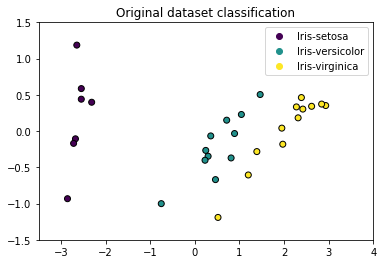

In [90]:
colours = np.unique(test_n, return_inverse=True)[1]
labels = np.unique(test_n, return_inverse=True)[0].tolist()

sc = plt.scatter(test_f[:,0], test_f[:,1], c=colours, edgecolors="k")
plt.title("Original dataset classification")
plt.legend(handles=sc.legend_elements()[0], labels=labels)

plt.xlim([-3.5, 4])
plt.ylim([-1.5, 1.5])

plt.show()

**Now it's clear why classifier confuses iris-versicolor and iris-virginica. Let's see how classifieir predicts labels for such data**

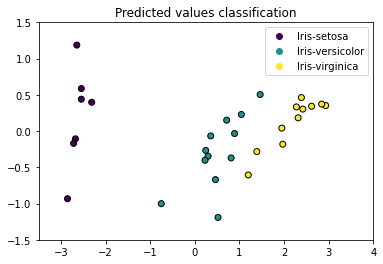

In [91]:
predicted = np.unique(clf.predict(test_f), return_inverse=True)[1]

pr_sc = plt.scatter(test_f[:,0], test_f[:,1], c=predicted, edgecolors="k")
plt.title("Predicted values classification")
plt.legend(handles=pr_sc.legend_elements()[0], labels=labels)

plt.xlim([-3.5, 4])
plt.ylim([-1.5, 1.5])
plt.show()